In [114]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [115]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

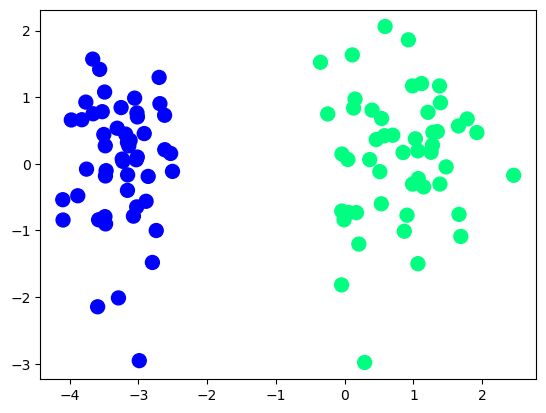

In [116]:
# plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [ ]:
# CampusX ka method:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    print(weights[0],weights[1:])

def step(z):
        return 1 if z>0 else 0

perceptron(X,y)


1.3000000000000003 [0.98628302 0.45500818]


In [ ]:
# Trying my own way out!
class MeraLoG:
    def __init__(self,learning_rate=0.5,epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        X = np.insert(X,0,1,axis=1)
        weights = np.ones(X.shape[1])

        for i in range(self.epochs):
            j = np.random.randint(0,X.shape[0])
            y_hat = self.step(np.dot(X[j],weights))
            weights = weights + self.lr*(y[j]-y_hat)*X[j]

        self.coef_ = weights[1:]
        self.intercept_ = weights[0]
        m = -(self.coef_[0]/self.coef_[1])
        b = -(self.intercept_/self.coef_[1])
        print(weights[0],weights[1:])
        return m,b

    def step(self,z):
        return 1 if z>0 else 0    

    def predict(X_test):
        pass

In [131]:
mLoG = MeraLoG()

In [132]:
m,b = mLoG.fit(X,y)

1.5 [ 1.14502124 -0.49046216]


In [133]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

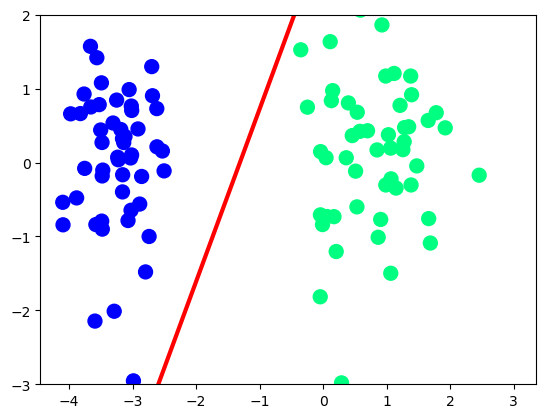

In [134]:
# plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [135]:
from sklearn.linear_model import LogisticRegression
loG = LogisticRegression(penalty=None,solver='sag')

In [136]:
loG.fit(X,y)

c:\Users\KIIT\anaconda-3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [137]:
print(loG.coef_)
print(loG.intercept_)

[[4.90457431 0.2371878 ]]
[5.85954494]


In [141]:
m = -(loG.coef_[0][0]/loG.coef_[0][1])
b = -(loG.intercept_/loG.coef_[0][1])

In [142]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

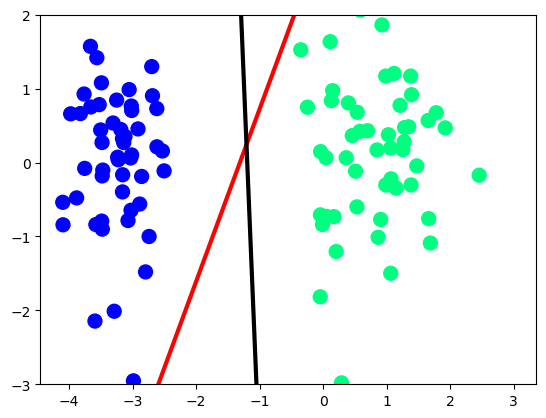

In [144]:
# plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
# SkLearn's logistic regression implementation is different from our Perceptron method. It better classifies the dataset as evident from above.